In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [107]:
df_titanic = pd.read_csv('titanic_train.csv')

In [108]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [109]:
df_titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

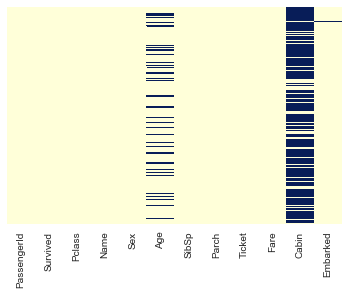

In [110]:
sns.heatmap(df_titanic.isnull(), yticklabels=False, cmap = 'YlGnBu', cbar=False)

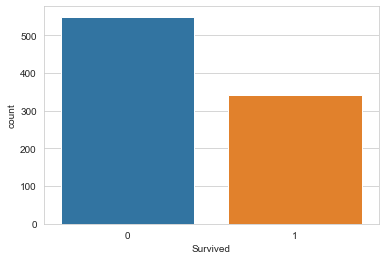

In [111]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data=df_titanic)

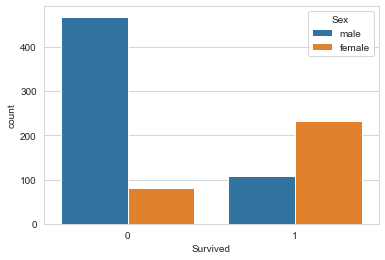

In [112]:
sns.countplot(x = 'Survived',hue = 'Sex', data=df_titanic)

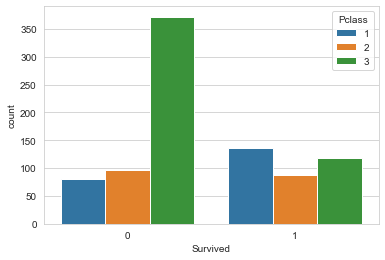

In [113]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Pclass', data=df_titanic)

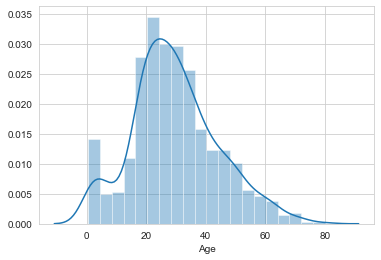

In [114]:
sns.distplot(df_titanic['Age'].dropna())

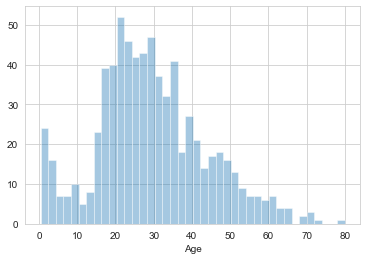

In [115]:
sns.distplot(df_titanic['Age'].dropna(), kde = False, bins=40)

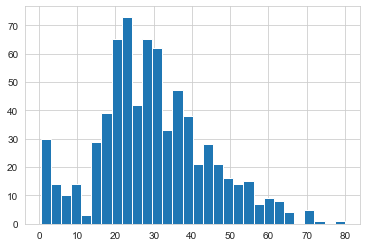

In [116]:
df_titanic['Age'].hist (bins = 30)

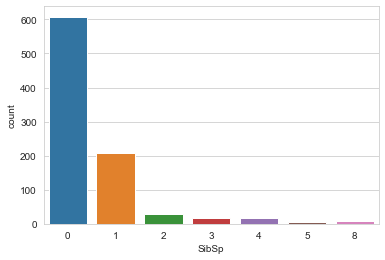

In [117]:
sns.countplot(x = 'SibSp', data=df_titanic)

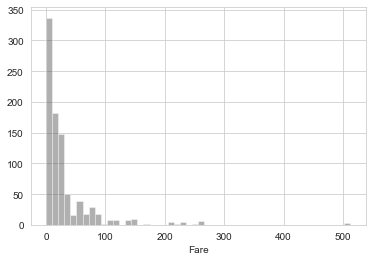

In [118]:
sns.distplot(df_titanic['Fare'], kde =False, color = '#3C3B3B')

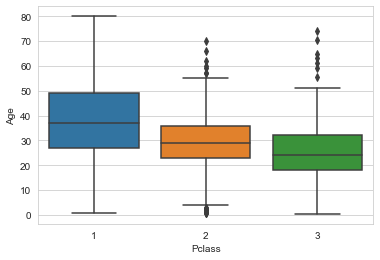

In [119]:
sns.boxplot(x='Pclass', y = 'Age', data=df_titanic)

In [120]:
def impute_age (cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        elif Pclass == 3:
            return 24
    else :
        return Age

In [121]:
df_titanic['Age'] = df_titanic[['Age', 'Pclass']].apply(impute_age, axis = 1)

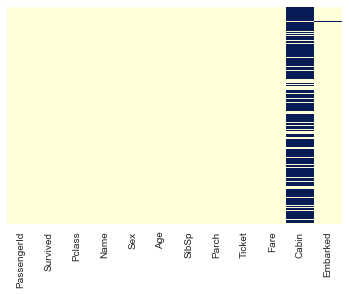

In [122]:
sns.heatmap(df_titanic.isnull(), yticklabels=False, cbar=False, cmap = 'YlGnBu')

In [123]:
df_titanic.drop('Cabin', inplace=True, axis=1)

In [124]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [125]:
embark = pd.get_dummies(df_titanic['Embarked'], drop_first=True)
sex = pd.get_dummies(df_titanic['Sex'], drop_first=True)

In [126]:
df_titanic.drop(['Name', 'Sex', 'Embarked', 'Ticket'], inplace=True, axis=1)

In [127]:
df_titanic_new = pd.concat([df_titanic, sex, embark], axis = 1)

In [128]:
df_titanic_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [129]:
X = df_titanic_new.drop('Survived', axis=1)
y = df_titanic_new.Survived

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
model = LogisticRegression()
fittedmodel = model.fit(X_train, y_train)
y_pred = fittedmodel.predict(X_test)

In [134]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [135]:
print(accuracy_score(y_pred, y_test))

0.835820895522388


In [136]:
print(confusion_matrix(y_pred, y_test))

[[151  28]
 [ 16  73]]


In [137]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
129,0,0
116,0,0
563,0,0
172,1,1
436,0,0
...,...,...
367,1,1
245,0,0
635,1,1
364,0,0
